

## <font color='blue'>Engenharia de Atributos e Pré-Processamento de Dados Para E-Commerce Analytics</font>

![](https://blog.cargobr.com/wp-content/uploads/2021/03/A-tecnologia-na-log%C3%ADstica-e-a-import%C3%A2ncia-da-efici%C3%AAncia-na-entrega-de-mercadorias.jpg)

# Parte 2

- Engenharia de Atributos
- Pré-Processamento de Dados

A Engenharia de Atributos refere-se ao processo de usar o conhecimento do domínio (área de negócio) para remover, selecionar e transformar os dados, mantendo somente os atributos mais relevantes.

In [1]:
# Bibliotecas necessárias
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

## Carregando o Dataset

In [2]:
# Carrega o dataset
df = pd.read_csv('dados/dataset.csv')

In [3]:
df.shape

(11000, 12)

In [4]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [7]:
# Variáveis numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'compras_anteriores', 
        'desconto', 
        'custo_produto', 
        'peso_gramas']

In [8]:
# Variáveis categóricas
cats = ['modo_envio', 
        'prioridade_produto', 
        'genero',
        'corredor_armazem']

In [9]:
# Variável target
target = ['entregue_no_prazo'] 

In [10]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,3.567727,13.372545,210.200909,3633.844455
std,1.141438,1.413570,1.522852,16.204943,48.062985,1635.402722
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000


In [11]:
df[cats].describe()

,modo_envio,prioridade_produto,genero,corredor_armazem
count,11000,11000,11000,11000
unique,3,3,2,5
top,Navio,baixa,F,F
freq,7463,5298,5546,3666


In [12]:
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
dtype: int64

## Limpeza de Dados

### Tratamento de Valores Ausentes

**ATENÇÃO**: Valor ausente significa ausência de informação e não ausência de dado!

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. Mas fique atento: a Engenharia de Atributos e o Pré-Processamento podem gerar valores ausentes, o que precisa ser tratado.

In [13]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [14]:
# Verifica se há valores ausentes
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

### Tratamento de Valores Duplicados

Valores duplicados significam duplicidade dos dados em toda a linha (todo o registro).

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos.

In [15]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [16]:
# Verifica se há valores duplicados
df.duplicated().sum()

0

### Tratamento de Valores Outliers

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. 

In [17]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 11000


In [18]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
0,4,2,3,44,177,1233
1,4,5,2,59,216,3088
2,2,2,4,48,183,3374
3,3,3,4,10,176,1177
4,2,2,3,46,184,2484


In [19]:
df.desconto.mean()

13.372545454545454

In [20]:
df.desconto.std()

16.20494287359407

<AxesSubplot:>

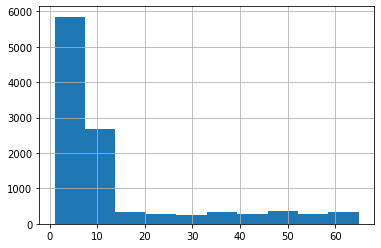

In [21]:
df.desconto.hist()

In [22]:
# Calcula os limites superior e inferior
# Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior

limite_superior = df.desconto.mean() + 3 * df.desconto.std()
print("Valor superior:", limite_superior)
limite_inferior = df.desconto.mean() - 3 * df.desconto.std()
print("Valor inferior:", limite_inferior)

Valor superior: 61.987374075327665
Valor inferior: -35.24228316623676


In [23]:
# Extrai os registros com outliers na coluna desconto
df_outliers_desconto = df[(df.desconto <= limite_inferior) | (df.desconto >= limite_superior)]
df_outliers_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [24]:
# Filtra o dataframe removendo os registros com outliers na coluna desconto
df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [25]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 10819


In [26]:
registros = np.array([True] * len(df))

In [27]:
type(registros)

numpy.ndarray

In [28]:
np.count_nonzero(registros == True)

10819

In [29]:
np.count_nonzero(registros == False)

0

In [30]:
# Variáveis numéricas (sem a variável desconto)
nums2 = ['numero_chamadas_cliente', 
         'avaliacao_cliente', 
         'compras_anteriores', 
         'custo_produto', 
         'peso_gramas']

In [31]:
# Loop por cada variável numérica
for col in nums2:
    
    # Calcula o z-score absoluto
    zscore = abs(stats.zscore(df[col])) 
    
    # Mantém valores com menos de 3 z-score absoluto
    registros = (zscore < 3) & registros

In [32]:
np.count_nonzero(registros == True)

10643

In [33]:
np.count_nonzero(registros == False)

176

In [34]:
# Removemos registros com o z-score abaixo de 3 nas colunas numéricas
df = df[registros] 

In [35]:
print(f'Número de linhas após filtrar valores extremos (outliers): {len(df)}')

Número de linhas após filtrar valores extremos (outliers): 10643


### Tratamento de Desbalanceamento de Classe

Deve ser feito nos dados de treino, após o pré-processamento dos dados.

In [36]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [37]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

## Engenharia de Atributos

## Feature Selection 

Aqui tomamos as decisões sobre quais variáveis serão usadas na Engenharia de Atributos.

In [38]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [39]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
305,306,F,Navio,4,4,249,3,media,F,36,3769,1
1871,1872,F,Navio,5,5,234,2,media,F,43,3822,1
7949,7950,F,Aviao,4,2,201,8,media,F,6,5128,0
9256,9257,C,Navio,5,3,273,4,media,M,1,5119,0
9306,9307,D,Caminhao,4,1,264,4,baixa,F,6,4863,0


In [40]:
# Correlação
df.corr()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


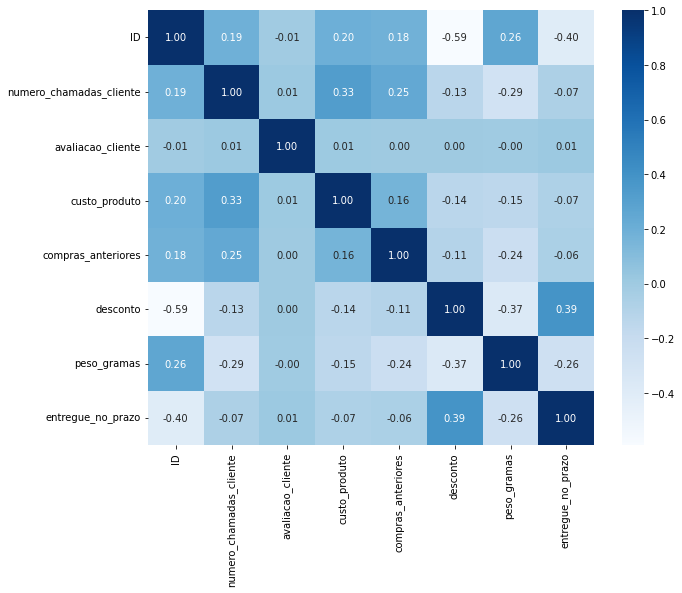

In [41]:
# Mapa de correlação 
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f');

**Decisão**: Na figura acima, os recursos que ultrapassaram o limite (+/- 0,05) na correlação com o recurso de destino (entregue_no_prazo) serão escolhidos para serem processados na Engenharia de Atributos, nesse caso: numero_chamadas_cliente, custo_produto, compras_anteriores, desconto e peso_gramas.

A variável avaliacao_cliente não parece relevante e não será processada na Engenharia de Atributos. A variável ID será descartada, pois não representa informação útil.

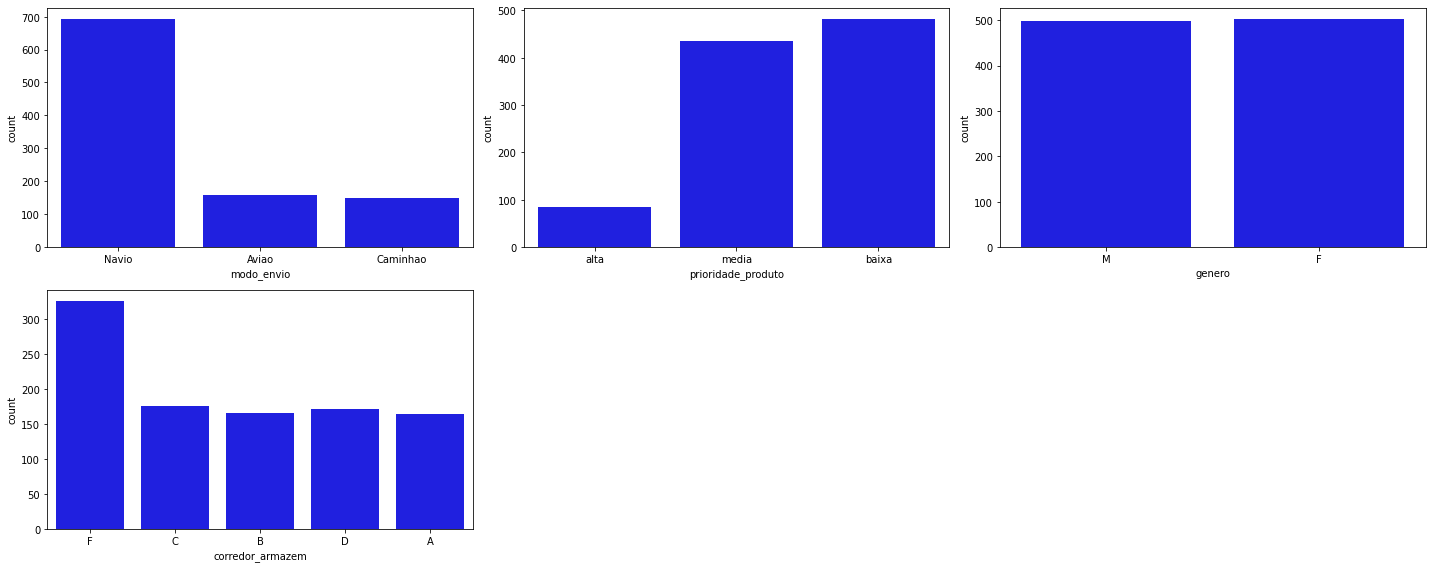

In [42]:
# Gráfico de barras
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20,8))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão**: Na figura acima pode-se ver que todas as variáveis categóricas têm uma diferença bastante grande em termos de contagens das classes, exceto a variável de Gênero. Sendo assim, não vamos considerar a variável genero na Engenharia de Atributos.

**Obs: Como as tarefas a seguir são complexas, demonstraremos apenas como algumas colunas. 

## Feature Extraction 

Aqui fazemos a extração de novas variáveis a partir da informação contida em outras variáveis.

In [43]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [44]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [45]:
# Cria uma cópia do dataframe
df_eng = df.copy()

In [46]:
df_eng.shape

(10643, 12)

In [47]:
df_eng.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### 1- Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [48]:
df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [49]:
# Criamos a variável e preenchemos com nan
df_eng['performance_prioridade_envio'] = np.nan

In [50]:
# Este passo é apenas para compreensão do que esta sendo feito
# np.Where = if
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Ruim", "Excelente")

In [51]:
df_eng['performance_prioridade_envio'].value_counts()

Excelente    10333
Ruim           310
Name: performance_prioridade_envio, dtype: int64

In [52]:
# Limpamos todos os valores da variável
df_eng['performance_prioridade_envio'] = np.nan

In [53]:
# Agora sim a solução!!!
df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável", 
    "Não Houve Atraso")))

In [54]:
df_eng['performance_prioridade_envio'].value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [55]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
6060,6061,D,Navio,4,3,199,3,baixa,M,8,4391,1,Não Houve Atraso
8384,8385,A,Navio,3,1,223,2,baixa,M,8,5719,1,Não Houve Atraso
9355,9356,F,Navio,6,4,257,4,baixa,F,4,1451,0,Atraso Tolerável
9506,9507,A,Navio,4,1,243,3,media,M,10,5832,0,Atraso Problemático
9902,9903,A,Navio,3,5,161,3,baixa,F,10,5663,1,Não Houve Atraso


In [56]:
# Agrupamos os dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [57]:
# Ajustamos os nomes das colunas
df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [58]:
# Pivot
df_report1 = pd.pivot_table(df_report1,
                             index = 'performance_prioridade_envio',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [59]:
# Novo ajuste nos nomes das colunas
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [60]:
# Replace do valor nan por zero
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [61]:
# Concatena colunas criando uma terceira variável
df_report1["Total"] = df_report1["Total Atraso"] + df_report1["Total no Prazo"]
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico,310.0,0.0,310.0
1,Atraso Problemático,1917.0,0.0,1917.0
2,Atraso Tolerável,2134.0,0.0,2134.0
3,Não Houve Atraso,0.0,6282.0,6282.0


In [62]:
# Não precisamos mais das colunas usadas na concatenação. Vamos removê-las.
df_report1.drop(df_report1.columns[[1, 2]], axis = 1, inplace = True)
df_report1.head()

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


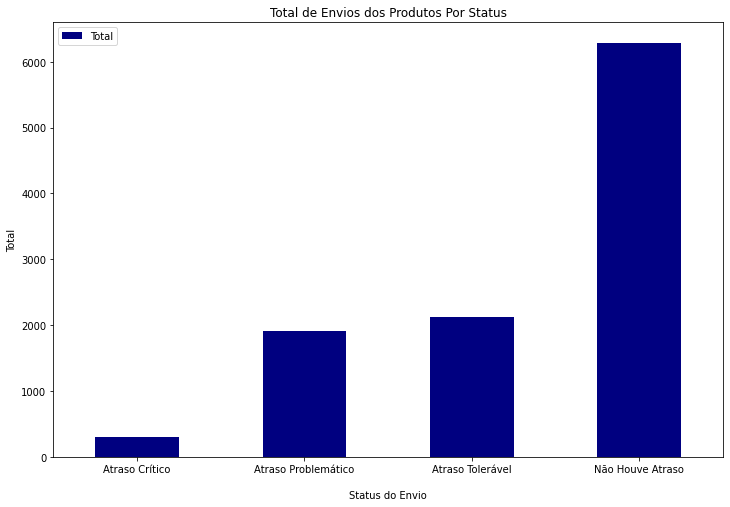

In [63]:
# Plot
# Concluindo que os atrasos tem difereça e tem relação com o envio do produto.
df_report1.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'jet',
                figsize=(12,8))
plt.xticks(rotation = 0)
plt.show()

### 2- Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio

O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é crítico por Navio.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é problemático por Navio.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é tolerável por Navio.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é crítico por Aviao.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é problemático por Aviao.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é tolerável por Aviao.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é crítico por Caminhao.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é problemático por Caminhao.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é tolerável por Caminhao.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [64]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [65]:
df_eng.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [66]:
# Solução
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Navio",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Aviao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Caminhao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Caminhao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Caminhao", 
    "Não Houve Atraso")))))))))

In [67]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
1629,1630,B,Caminhao,3,2,150,3,media,M,29,1354,1,Não Houve Atraso,Não Houve Atraso
10900,10901,C,Navio,5,5,196,4,media,M,8,4604,1,Não Houve Atraso,Não Houve Atraso
9650,9651,A,Navio,6,1,117,7,media,F,4,4211,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio
762,763,D,Navio,6,5,176,4,media,M,31,1262,1,Não Houve Atraso,Não Houve Atraso
8024,8025,A,Navio,7,3,296,4,media,M,8,1826,1,Não Houve Atraso,Não Houve Atraso


In [68]:
df_eng.performance_modo_envio.value_counts()

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [69]:
# Agrupamos os dados para análise
df_report2 = df_eng.groupby(['performance_modo_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453


In [70]:
df_report2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_report2.head(10)

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310
5,Atraso Problemático na Entrega Por Navio,0,1307
6,Atraso Tolerável na Entrega Por Aviao,0,331
7,Atraso Tolerável na Entrega Por Caminhao,0,350
8,Atraso Tolerável na Entrega Por Navio,0,1453
9,Não Houve Atraso,1,6282


In [71]:
# Pivot
df_report2 = pd.pivot_table(df_report2,
                            index = 'performance_modo_envio',
                            columns = 'entregue_no_prazo',
                            values = 'contagem').reset_index()
df_report2.head(10)

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [72]:
df_report2.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN
5,Atraso Problemático na Entrega Por Navio,1307.0,NaN
6,Atraso Tolerável na Entrega Por Aviao,331.0,NaN
7,Atraso Tolerável na Entrega Por Caminhao,350.0,NaN
8,Atraso Tolerável na Entrega Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [73]:
# Replace do valor nan por zero
df_report2['Total Atraso'] = df_report2['Total Atraso'].replace(np.nan, 0)
df_report2['Total no Prazo'] = df_report2['Total no Prazo'].replace(np.nan, 0)
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0
9,Não Houve Atraso,0.0,6282.0


In [74]:
# Concatena colunas criando uma terceira variável
df_report2["Total"] = df_report2["Total Atraso"] + df_report2["Total no Prazo"]
df_report2.head(10)

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0,51.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0,0.0,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0,0.0,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0,0.0,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0,0.0,1453.0
9,Não Houve Atraso,0.0,6282.0,6282.0


In [75]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report2.drop(df_report2.columns[[1, 2]], axis = 1, inplace = True)
df_report2.head(10)

,Status do Envio,Total
0,Atraso Crítico na Entrega Por Aviao,65.0
1,Atraso Crítico na Entrega Por Caminhao,51.0
2,Atraso Crítico na Entrega Por Navio,194.0
3,Atraso Problemático na Entrega Por Aviao,300.0
4,Atraso Problemático na Entrega Por Caminhao,310.0
5,Atraso Problemático na Entrega Por Navio,1307.0
6,Atraso Tolerável na Entrega Por Aviao,331.0
7,Atraso Tolerável na Entrega Por Caminhao,350.0
8,Atraso Tolerável na Entrega Por Navio,1453.0
9,Não Houve Atraso,6282.0


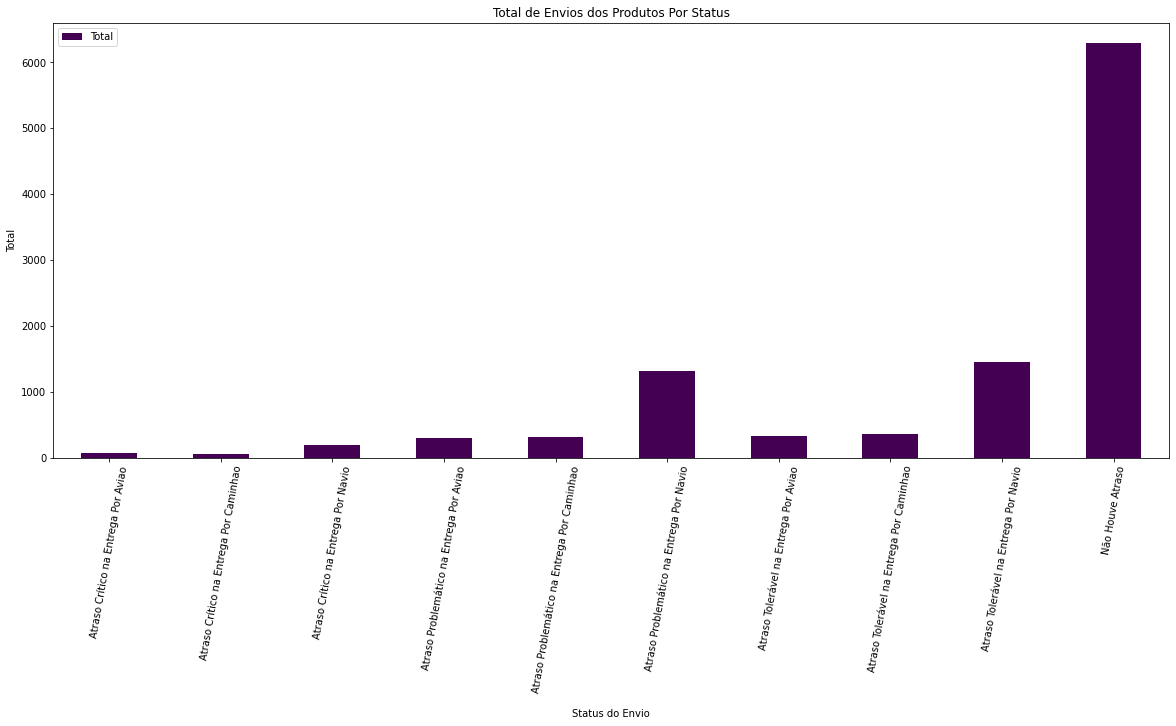

In [76]:
# Plot
df_report2.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'viridis',
                figsize = (20,8))
plt.xticks(rotation = 80)
plt.show()

### 3- Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

Criaremos duas novas variáveis com base na seguinte regra de negócio:

**Variável 1 - faixa_desconto**

- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - performance_faixa_desconto**

- Se a faixa de desconto foi acima ou igual à média e houve atraso na entrega = "Atraso na Entrega com Desconto Acima da Média"

- Se a faixa de desconto foi acima ou igual à e não houve atraso na entrega = "Entrega no Prazo com Desconto Acima da Média"

- Se a faixa de desconto foi abaixo da média e houve atraso na entrega = "Atraso na Entrega com Desconto Abaixo da Média"

- Se a faixa de desconto foi abaixo da média e não houve atraso na entrega = "Entrega no Prazo com Desconto Abaixo da Média"

In [77]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
5617,5618,F,Aviao,5,4,281,3,baixa,F,10,5675,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Aviao
9506,9507,A,Navio,4,1,243,3,media,M,10,5832,0,Atraso Problemático,Atraso Problemático na Entrega Por Navio
648,649,D,Navio,4,3,202,3,media,M,2,3962,1,Não Houve Atraso,Não Houve Atraso
6240,6241,D,Navio,5,4,280,4,baixa,M,10,5156,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio
10739,10740,F,Navio,5,3,242,5,baixa,F,9,1716,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio


In [78]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio'],
      dtype='object')

In [79]:
df_eng.desconto.describe()

count    10643.000000
mean        12.528047
std         14.991968
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: desconto, dtype: float64

In [80]:
# Variável 1
df_eng['faixa_desconto'] = np.where(df_eng.desconto >= 12, "Desconto Acima da Media", "Desconto Abaixo da Media") 

In [81]:
df_eng['faixa_desconto'].value_counts()

Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: faixa_desconto, dtype: int64

In [82]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto
4676,4677,A,Navio,3,5,216,3,alta,F,2,4242,0,Atraso Crítico,Atraso Crítico na Entrega Por Navio,Desconto Abaixo da Media
5326,5327,C,Caminhao,6,1,250,3,baixa,M,5,5621,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media
2252,2253,A,Navio,4,1,173,2,media,M,53,1251,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media
1791,1792,B,Aviao,4,4,137,2,media,M,37,1447,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media
7013,7014,F,Navio,3,5,251,4,media,F,3,5215,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media


In [83]:
# Variável 2
df_eng['performance_faixa_desconto'] = np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Acima da Media", 
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Abaixo da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Acima da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Acima da Media",
    np.where(
        (df_eng['faixa_desconto'] == 'Desconto Abaixo da Media') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Abaixo da Media",
   "NA"))))

In [84]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
5319,5320,B,Caminhao,4,3,274,3,alta,F,7,5517,0,Atraso Crítico,Atraso Crítico na Entrega Por Caminhao,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
10723,10724,F,Navio,5,5,221,5,baixa,M,7,1958,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
5800,5801,C,Navio,3,5,183,2,baixa,M,8,5881,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
1542,1543,D,Navio,3,5,160,2,media,F,41,1495,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
243,244,B,Navio,2,4,136,3,baixa,M,43,1958,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [85]:
df_eng['performance_faixa_desconto'].value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [86]:
# Agrupamos os dados para análise
df_report3 = df_eng.groupby(['performance_faixa_desconto', 
                             'entregue_no_prazo']).agg({'ID': ['count']}).reset_index()
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,ID
,,,count
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [87]:
df_report3.columns = ['performance_faixa_desconto', 'entregue_no_prazo', 'contagem']
df_report3.head()

,performance_faixa_desconto,entregue_no_prazo,contagem
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [88]:
# Pivot
df_report3 = pd.pivot_table(df_report3,
                             index = 'performance_faixa_desconto',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report3.head()

entregue_no_prazo,performance_faixa_desconto,0,1
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [89]:
df_report3.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [90]:
# Replace do valor nan por zero
df_report3['Total Atraso'] = df_report3['Total Atraso'].replace(np.nan, 0)
df_report3['Total no Prazo'] = df_report3['Total no Prazo'].replace(np.nan, 0)
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0


In [91]:
# Concatena colunas criando uma terceira variável
df_report3["Total"] = df_report3["Total Atraso"] + df_report3["Total no Prazo"]
df_report3.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0,2374.0


In [92]:
# Não precisamos mais dessas colunas. Vamos removê-las.
df_report3.drop(df_report3.columns[[1, 2]], axis = 1, inplace = True)
df_report3.head()

,Status do Envio,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,3908.0
2,Entrega no Prazo com Desconto Acima da Media,2374.0


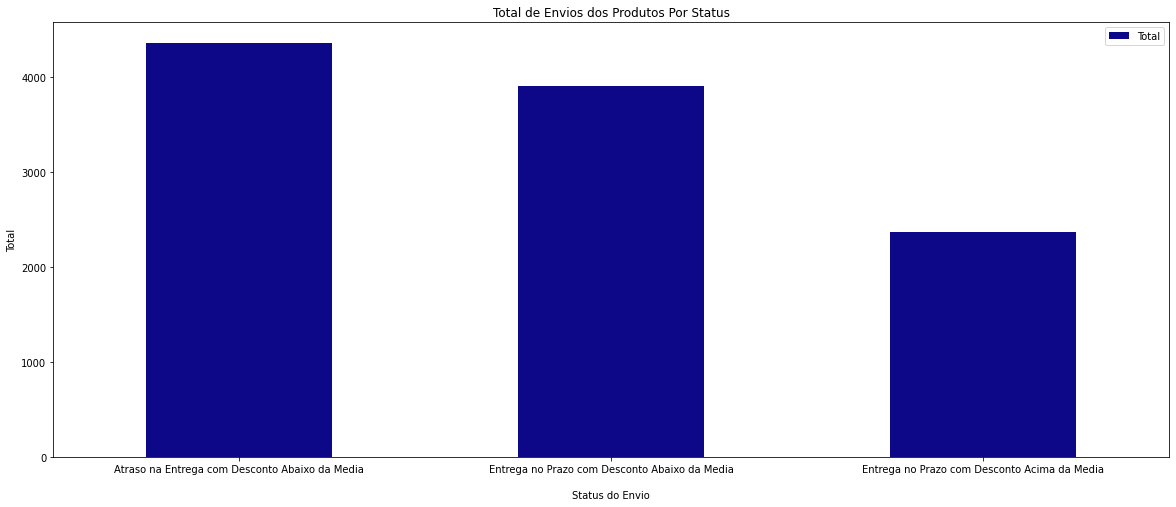

In [93]:
# Plot
df_report3.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'plasma',
                figsize = (20,8))
plt.xticks(rotation = 0)
plt.show()

In [94]:
df_eng.sample(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
9439,9440,F,Caminhao,5,4,244,5,media,F,1,1320,0,Atraso Problemático,Atraso Problemático na Entrega Por Caminhao,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
2038,2039,C,Caminhao,3,2,254,2,baixa,M,37,2469,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
9742,9743,C,Aviao,3,3,154,2,baixa,M,1,5884,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
400,401,C,Caminhao,4,3,134,3,baixa,M,51,1965,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
6189,6190,B,Navio,4,4,274,2,baixa,F,3,4257,0,Atraso Tolerável,Atraso Tolerável na Entrega Por Navio,Desconto Abaixo da Media,Atraso na Entrega com Desconto Abaixo da Media
10768,10769,C,Navio,4,1,237,5,media,M,5,1154,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
65,66,F,Navio,3,2,202,3,baixa,M,49,2881,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3582,3583,D,Navio,3,4,182,3,media,F,2,5281,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
1749,1750,B,Navio,3,1,174,4,baixa,M,18,1072,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
5188,5189,C,Caminhao,3,1,221,3,alta,M,3,5005,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media


In [95]:
# Salva o dataframe
df_eng.to_csv('dados/df_eng.csv', sep = ',', encoding = 'utf-8')

## Carregando o Dataset Gerado 

In [96]:
# Carrega o dataset
df = pd.read_csv('dados/df_eng.csv', index_col = 0)

In [97]:
df.shape

(10643, 16)

In [98]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10643 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            10643 non-null  int64 
 1   corredor_armazem              10643 non-null  object
 2   modo_envio                    10643 non-null  object
 3   numero_chamadas_cliente       10643 non-null  int64 
 4   avaliacao_cliente             10643 non-null  int64 
 5   custo_produto                 10643 non-null  int64 
 6   compras_anteriores            10643 non-null  int64 
 7   prioridade_produto            10643 non-null  object
 8   genero                        10643 non-null  object
 9   desconto                      10643 non-null  int64 
 10  peso_gramas                   10643 non-null  int64 
 11  entregue_no_prazo             10643 non-null  int64 
 12  performance_prioridade_envio  10643 non-null  object
 13  performance_modo

In [100]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio', 'faixa_desconto',
       'performance_faixa_desconto'],
      dtype='object')

## Label Encoding

Label  Encoding (codificação  de  rótulos) é  uma  técnica  de  codificação para  lidar  comvariáveis categóricas. Nesta técnica, a cada rótulo é atribuído um número inteiro exclusivo com base na ordem alfabética.
Na  codificação  de  rótulos  em  Python,  substituímos  o  valor  categórico  por  um  valor numérico entre 0 e o número de classes menos 1. Se ovalor da variável categórica contiver 5 classes distintasusamos (0, 1, 2, 3 e 4).Observe que os dados são modificados, mas sem perder a informação que eles representam.
Isso  pode  ser  feito de  maneira  manual  (usando  dicionários  em  Python)  ou  com  o algoritmo LabelEncoder do pacote Scikit-Learn. Veremos os dois métodos na sequência.

### Método 1

In [101]:
# Variável categórica ordinal
df.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [102]:
# Dicionário de mapeamento
dic_prioridade_produto = {'baixa' : 1, 'media' : 2, 'alta' : 0}

In [103]:
df['prioridade_produto'] = df['prioridade_produto'].map(dic_prioridade_produto)

In [104]:
df.prioridade_produto.value_counts()

1    5174
2    4587
0     882
Name: prioridade_produto, dtype: int64

In [105]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,1,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,Aviao,4,5,216,2,1,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,Aviao,2,2,183,4,1,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,Aviao,3,3,176,4,2,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,Aviao,2,2,184,3,2,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [106]:
# Variável categórica ordinal (passível de interpretação)
df.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [107]:
# Dicionário de mapeamento
dic_modo_envio = {'Navio' : 0, 'Aviao' : 1, 'Caminhao' : 2}

In [108]:
df['modo_envio'] = df['modo_envio'].map(dic_modo_envio)

In [109]:
df.modo_envio.value_counts()

0    7212
1    1728
2    1703
Name: modo_envio, dtype: int64

In [110]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,1,4,2,177,3,1,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,1,4,5,216,2,1,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,1,2,2,183,4,1,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,1,3,3,176,4,2,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,1,2,2,184,3,2,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


### Método 2

In [111]:
# Variável categórica nominal
df.genero.value_counts()

F    5357
M    5286
Name: genero, dtype: int64

In [112]:
# Cria o objeto encoder
le = LabelEncoder()

In [113]:
# Treina o objeto (normalmente fazemos isso somente com dados de treino)
le.fit(df.genero)

LabelEncoder()

In [114]:
list(le.classes_)

['F', 'M']

In [115]:
# Aplicamos o objeto encoder treinado 
# (fazemos isso em dados de treino e teste e também em novos dados usados no modelo)
df.genero = le.transform(df.genero)

In [116]:
df.genero.value_counts()

0    5357
1    5286
Name: genero, dtype: int64

## One-Hot Encoding
Hot  Encoding  é  outra  técnica  popular  para  tratar  variáveis  categóricas.  Ele simplesmente cria recursos adicionais com base no número de valores exclusivos no recurso categórico.  Cada  valor  exclusivo  na  categoria  será  adicionado  como  um  recurso (uma nova variável).

Nessa abordagem, para cada categoria de um recurso, criamos uma nova coluna (às vezes chamada de variável fictícia) com codificação binária (0 ou 1) para indicar se uma determinada linha pertence a essa categoria.


![title](imagens/onehot.png)

In [117]:
df.head()


,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,1,4,2,177,3,1,0,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,1,4,5,216,2,1,1,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,1,2,2,183,4,1,1,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,1,3,3,176,4,2,1,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,1,2,2,184,3,2,0,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [118]:
# Variável categórica nominal
# Ideal Hot encoding
df.corredor_armazem.value_counts()

F    3539
B    1778
D    1777
A    1777
C    1772
Name: corredor_armazem, dtype: int64

In [119]:
# Variável categórica nominal
df.performance_prioridade_envio.value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [120]:
# Variável categórica nominal
df.performance_modo_envio.value_counts()

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [121]:
# Variável categórica nominal
df.faixa_desconto.value_counts()

Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: faixa_desconto, dtype: int64

In [122]:
# Variável categórica nominal
df.performance_faixa_desconto.value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [123]:
# Aplicando One-Hot Encoding
for cat in ['corredor_armazem', 
            'performance_prioridade_envio', 
            'performance_modo_envio', 
            'faixa_desconto', 
            'performance_faixa_desconto']:
    onehots = pd.get_dummies(df[cat], prefix = cat)
    df = df.join(onehots)

In [124]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio', 'faixa_desconto',
       'performance_faixa_desconto', 'corredor_armazem_A',
       'corredor_armazem_B', 'corredor_armazem_C', 'corredor_armazem_D',
       'corredor_armazem_F', 'performance_prioridade_envio_Atraso Crítico',
       'performance_prioridade_envio_Atraso Problemático',
       'performance_prioridade_envio_Atraso Tolerável',
       'performance_prioridade_envio_Não Houve Atraso',
       'performance_modo_envio_Atraso Crítico na Entrega Por Aviao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Navio',
       'performance_modo_envio_Atraso Problemático na Entrega Por Aviao',
       'performance

In [125]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,D,1,4,2,177,3,1,0,44,...,0,0,0,0,1,0,1,0,0,1
1,2,F,1,4,5,216,2,1,1,59,...,0,0,0,0,1,0,1,0,0,1
2,3,A,1,2,2,183,4,1,1,48,...,0,0,0,0,1,0,1,0,0,1
3,4,B,1,3,3,176,4,2,1,10,...,0,0,0,0,1,1,0,0,1,0
4,5,C,1,2,2,184,3,2,0,46,...,0,0,0,0,1,0,1,0,0,1


In [126]:
# Não precisaremos mais das colunas originais após aplicar One-Hot Encoding
df = df.drop(columns = ['corredor_armazem', 
                        'performance_prioridade_envio', 
                        'performance_modo_envio', 
                        'faixa_desconto', 
                        'performance_faixa_desconto'])

In [127]:
# Podemos remover a coluna ID
df = df.drop(columns = ['ID'])

In [128]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,0,0,1,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,0,0,1,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,0,0,1,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,0,0,1,1,0,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,0,0,1,0,1,0,0,1


## Fature Scaling

- O dimensionamento de recursos (Fature Scaling) consiste em transformar o valor dos recursos em uma faixa semelhante, para que os algoritmos de aprendizado de máquina se comportem melhor, resultando em modelos ideais.

- Padronização e normalização são duas técnicas mais comuns para dimensionamento de recursos.

- A normalização é transformar os valores dos recursos para que caiam dentro dos intervalos limitados (min e max).

- A padronização é transformar os valores de recursos para cair em torno da média como 0 com desvio padrão como 1.

- A padronização mantém informações úteis sobre valores discrepantes e torna o algoritmo menos sensível a eles em contraste com o dimensionamento mínimo-máximo.

- A classe MinMaxScaler() de sklearn.preprocessing é usada para normalização de recursos.

- A classe StandardScaler() de sklearn.preprocessing é usada para padronização de recursos.

In [129]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,0,0,1,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,0,0,1,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,0,0,1,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,0,0,1,1,0,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,0,0,1,0,1,0,0,1


In [130]:
df.columns

Index(['modo_envio', 'numero_chamadas_cliente', 'avaliacao_cliente',
       'custo_produto', 'compras_anteriores', 'prioridade_produto', 'genero',
       'desconto', 'peso_gramas', 'entregue_no_prazo', 'corredor_armazem_A',
       'corredor_armazem_B', 'corredor_armazem_C', 'corredor_armazem_D',
       'corredor_armazem_F', 'performance_prioridade_envio_Atraso Crítico',
       'performance_prioridade_envio_Atraso Problemático',
       'performance_prioridade_envio_Atraso Tolerável',
       'performance_prioridade_envio_Não Houve Atraso',
       'performance_modo_envio_Atraso Crítico na Entrega Por Aviao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Navio',
       'performance_modo_envio_Atraso Problemático na Entrega Por Aviao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Navio',
       'performance_m

**ATENÇÃO**: No caso de normalizar o conjunto de dados de treinamento e teste, o estimador MinMaxScaler() terá o fit() no conjunto de dados de treinamento e o mesmo estimador será usado para transformar o conjunto de dados de treinamento e teste. O mesmo estimador também deve ser usado em novos dados ao fazer previsões com o modelo.

In [131]:
df.peso_gramas.sample(5)

2885    2591
8352    1592
8833    1589
3739    4314
6099    4670
Name: peso_gramas, dtype: int64

In [132]:
df['peso_gramas'] = MinMaxScaler().fit_transform(df['peso_gramas'].values.reshape(len(df), 1))

In [133]:
df.peso_gramas.sample(5)

9559    0.632579
586     0.044704
1102    0.298320
6872    0.035354
7683    0.447480
Name: peso_gramas, dtype: float64

In [134]:
df.custo_produto.sample(5)

6764    172
6776    257
8054    267
7123    168
101     227
Name: custo_produto, dtype: int64

In [135]:
df['custo_produto'] = MinMaxScaler().fit_transform(df['custo_produto'].values.reshape(len(df), 1))

In [136]:
df.custo_produto.sample(10)

2362     0.317757
9256     0.827103
5944     0.887850
10016    0.411215
2119     0.570093
1192     0.700935
6438     0.271028
3521     0.439252
6163     0.537383
6875     0.710280
Name: custo_produto, dtype: float64

**ATENÇÃO**: No caso de padronizar o conjunto de dados de treinamento e teste, o estimador StandardScaler() terá o fit() no conjunto de dados de treinamento e o mesmo estimador será usado para transformar o conjunto de dados de treinamento e teste. O mesmo estimador também deve ser usado em novos dados ao fazer previsões com o modelo.

In [137]:
df['desconto'] = StandardScaler().fit_transform(df['desconto'].values.reshape(len(df), 1))

In [138]:
df['numero_chamadas_cliente'] = StandardScaler().fit_transform(df['numero_chamadas_cliente'].values.reshape(len(df), 
                                                                                                            1))

In [139]:
df.numero_chamadas_cliente.sample(10)

5609   -0.057348
8506   -0.930527
5621   -0.930527
8154   -0.057348
703    -0.057348
3485   -0.057348
4234   -0.057348
5698   -0.930527
1633    0.815832
3568   -0.057348
Name: numero_chamadas_cliente, dtype: float64

In [140]:
df['avaliacao_cliente'] = StandardScaler().fit_transform(df['avaliacao_cliente'].values.reshape(len(df), 1))

In [141]:
df.avaliacao_cliente.sample(10)

5084     1.423904
2157     1.423904
9695     0.007718
10991   -0.700376
7377     1.423904
9173    -0.700376
1870    -1.408469
3694    -1.408469
6606     0.715811
7845    -1.408469
Name: avaliacao_cliente, dtype: float64

In [142]:
df['compras_anteriores'] = StandardScaler().fit_transform(df['compras_anteriores'].values.reshape(len(df), 1))

In [143]:
df.compras_anteriores.sample(10)

7657    2.743911
9770    1.192105
2312   -0.359702
7563    1.192105
8931    1.192105
1041   -0.359702
1744   -0.359702
1502   -0.359702
2973   -1.135605
5192   -0.359702
Name: compras_anteriores, dtype: float64

In [144]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Problemático na Entrega Por Navio,performance_modo_envio_Atraso Tolerável na Entrega Por Aviao,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,faixa_desconto_Desconto Abaixo da Media,faixa_desconto_Desconto Acima da Media,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,-0.057348,-0.700376,0.378505,-0.359702,1,0,2.099353,0.033893,1,...,0,0,0,0,1,0,1,0,0,1
1,1,-0.057348,1.423904,0.560748,-1.135605,1,1,3.099936,0.304894,1,...,0,0,0,0,1,0,1,0,0,1
2,1,-1.803706,-0.700376,0.406542,0.416201,1,1,2.366175,0.346676,1,...,0,0,0,0,1,0,1,0,0,1
3,1,-0.930527,0.007718,0.373832,0.416201,2,1,-0.168635,0.025712,1,...,0,0,0,0,1,1,0,0,1,0
4,1,-1.803706,-0.700376,0.411215,-0.359702,2,0,2.232764,0.216654,1,...,0,0,0,0,1,0,1,0,0,1


In [145]:
df.to_csv('dados/dataset_final.csv', sep = ',', encoding = 'utf-8')

# Fim

Obs: As Técnicas aqui aprendidas e utilizadas são uma das que aplicamos no curso que faço atualmente, ministrado pela Data Science Academy.